##[2015 NYC Street Tree Census - Tree Data](https://data.cityofnewyork.us/Environment/2015-Street-Tree-Census-Tree-Data/uvpi-gqnh/about_data)


*   Department of Parks and Recreation (DPR)
*   Updated November 12, 2024





In [ ]:
### Importing Libraries and Loading the Dataset

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
%matplotlib inline

In [5]:
#give colab acces to read files from drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
tree_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2015_Street_Tree_Census_-_Tree_Data_20250427.csv')

In [7]:
tree_df.head(3)

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,...,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
0,180683,348711,08/27/2015,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,...,4073900,New York,40.723092,-73.844215,1027431.148,202756.7687,29.0,739.0,4052307.0,4.022210e+09
1,200540,315986,09/03/2015,21,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,...,4097300,New York,40.794111,-73.818679,1034455.701,228644.8374,19.0,973.0,4101931.0,4.044750e+09
2,204026,218365,09/05/2015,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,3044900,New York,40.717581,-73.936608,1001822.831,200716.8913,34.0,449.0,3338310.0,3.028870e+09


##Describe the Data

In [ ]:
##Exploring the structure and summary of the data ( .shape, .info(), .describe(), .isnull() )

In [8]:
tree_df.shape

(683788, 45)

In [9]:
tree_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683788 entries, 0 to 683787
Data columns (total 45 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   tree_id           683788 non-null  int64  
 1   block_id          683788 non-null  int64  
 2   created_at        683788 non-null  object 
 3   tree_dbh          683788 non-null  int64  
 4   stump_diam        683788 non-null  int64  
 5   curb_loc          683788 non-null  object 
 6   status            683788 non-null  object 
 7   health            652172 non-null  object 
 8   spc_latin         652169 non-null  object 
 9   spc_common        652169 non-null  object 
 10  steward           164350 non-null  object 
 11  guards            79866 non-null   object 
 12  sidewalk          652172 non-null  object 
 13  user_type         683788 non-null  object 
 14  problems          225844 non-null  object 
 15  root_stone        683788 non-null  object 
 16  root_grate        68

In [10]:
tree_df.isnull().sum()

,0
tree_id,0
block_id,0
created_at,0
tree_dbh,0
stump_diam,0
curb_loc,0
status,0
health,31616
spc_latin,31619
spc_common,31619


In [11]:
tree_df.describe()

,tree_id,block_id,tree_dbh,stump_diam,postcode,community board,borocode,cncldist,st_assem,st_senate,boro_ct,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
count,683788.000000,683788.000000,683788.000000,683788.000000,683788.000000,683788.000000,683788.000000,683788.000000,683788.000000,683788.000000,6.837880e+05,683788.000000,683788.000000,6.837880e+05,683788.000000,677269.000000,677269.000000,6.742290e+05,6.742290e+05
mean,365205.011085,313793.096236,11.279787,0.432463,10916.246044,343.505404,3.358500,29.943181,50.791583,20.615781,3.404914e+06,40.701261,-73.924060,1.005280e+06,194798.424625,30.027330,11957.368422,3.495439e+06,3.413414e+09
std,208122.092902,114839.024312,8.723042,3.290241,651.553364,115.740601,1.166746,14.328531,18.966520,7.390844,1.175863e+06,0.090311,0.123583,3.428505e+04,32902.061114,14.301717,30745.739811,1.193275e+06,1.174892e+09
min,3.000000,100002.000000,0.000000,0.000000,83.000000,101.000000,1.000000,1.000000,23.000000,10.000000,1.000201e+06,40.498466,-74.254965,9.133493e+05,120973.792200,1.000000,1.000000,1.000000e+06,0.000000e+00
25%,186582.750000,221556.000000,4.000000,0.000000,10451.000000,302.000000,3.000000,19.000000,33.000000,14.000000,3.011700e+06,40.631928,-73.980500,9.896578e+05,169515.153700,19.000000,202.000000,3.031991e+06,3.011240e+09
50%,366214.500000,319967.000000,9.000000,0.000000,11214.000000,402.000000,4.000000,30.000000,52.000000,21.000000,4.008100e+06,40.700612,-73.912911,1.008386e+06,194560.252500,30.000000,516.000000,4.020352e+06,4.008560e+09
75%,546170.250000,404624.000000,16.000000,0.000000,11365.000000,412.000000,4.000000,43.000000,64.000000,25.000000,4.103202e+06,40.762228,-73.834910,1.029991e+06,217019.571950,43.000000,1417.000000,4.263123e+06,4.105700e+09
max,722694.000000,999999.000000,450.000000,140.000000,11697.000000,503.000000,5.000000,51.000000,87.000000,36.000000,5.032300e+06,40.912918,-73.700488,1.067248e+06,271894.092100,51.000000,157903.000000,5.515124e+06,5.080500e+09


##Data Cleaning

In [ ]:
##Data Cleaning: Standardizing Missing Values and Dropping Unnecessary Columns

In [12]:
#converting non-standard missing values into standard-one
mising_values = [' ', 'UNKNOWN']
tree_df_upd = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2015_Street_Tree_Census_-_Tree_Data_20250427.csv', na_values =  mising_values)

In [13]:
tree_df_upd.columns

Index(['tree_id', 'block_id', 'created_at', 'tree_dbh', 'stump_diam',
       'curb_loc', 'status', 'health', 'spc_latin', 'spc_common', 'steward',
       'guards', 'sidewalk', 'user_type', 'problems', 'root_stone',
       'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other',
       'brch_light', 'brch_shoe', 'brch_other', 'address', 'postcode',
       'zip_city', 'community board', 'borocode', 'borough', 'cncldist',
       'st_assem', 'st_senate', 'nta', 'nta_name', 'boro_ct', 'state',
       'latitude', 'longitude', 'x_sp', 'y_sp', 'council district',
       'census tract', 'bin', 'bbl'],
      dtype='object')

In [14]:
#dropping the columns I'm not going to use for the visualization
tree_df_dropped = tree_df_upd.drop(columns =['spc_latin', 'address', 'postcode', 'zip_city', 'cncldist', 'community board', 'st_assem', 'st_senate', 'cncldist',
       'st_assem', 'nta', 'nta_name', 'boro_ct', 'state', 'x_sp', 'y_sp',  'council district',
       'census tract', 'bin', 'bbl'], inplace=False)

In [15]:
tree_df_dropped.head(3)

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_common,steward,...,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,borocode,borough,latitude,longitude
0,180683,348711,08/27/2015,3,0,OnCurb,Alive,Fair,red maple,NaN,...,No,No,No,No,No,No,4,Queens,40.723092,-73.844215
1,200540,315986,09/03/2015,21,0,OnCurb,Alive,Fair,pin oak,NaN,...,No,No,No,No,No,No,4,Queens,40.794111,-73.818679
2,204026,218365,09/05/2015,3,0,OnCurb,Alive,Good,honeylocust,1or2,...,No,No,No,No,No,No,3,Brooklyn,40.717581,-73.936608


In [16]:
tree_df_dropped.columns

Index(['tree_id', 'block_id', 'created_at', 'tree_dbh', 'stump_diam',
       'curb_loc', 'status', 'health', 'spc_common', 'steward', 'guards',
       'sidewalk', 'user_type', 'problems', 'root_stone', 'root_grate',
       'root_other', 'trunk_wire', 'trnk_light', 'trnk_other', 'brch_light',
       'brch_shoe', 'brch_other', 'borocode', 'borough', 'latitude',
       'longitude'],
      dtype='object')

##Explore the Dataset - stats and data analysis

In [ ]:
##Statistical Analysis and Data Manipulation
##Analyzing Tree Patterns Across New York City

In [17]:
#Number of tree species for all New York boroughs
tree_df_dropped.groupby(["spc_common"])["tree_id"].count().sort_values(ascending=False)

,tree_id
spc_common,
London planetree,87014
honeylocust,64264
Callery pear,58931
pin oak,53185
Norway maple,34189
...,...
black pine,37
pitch pine,33
Osage-orange,29


In [18]:
#Number of tree species for each New York boroughs
tree_df_dropped.groupby(["borough", "spc_common"])["tree_id"].count().sort_values(ascending=False)

borough        spc_common      
Brooklyn       London planetree    34886
Queens         London planetree    31111
               pin oak             22610
Staten Island  Callery pear        21059
Queens         honeylocust         20290
                                   ...  
Manhattan      pignut hickory          1
               spruce                  1
               smoketree               1
Bronx          Virginia pine           1
Manhattan      white pine              1
Name: tree_id, Length: 655, dtype: int64

In [19]:
# Top 5 species by borough
tspecies_by_borough = tree_df_dropped.groupby(['borough', 'spc_common'])['tree_id'].count().reset_index().sort_values(['borough', 'tree_id'], ascending=[True, False])

top_five_species = tspecies_by_borough.groupby('borough').head(5).reset_index(drop=True)
print(top_five_species)

          borough        spc_common  tree_id
0           Bronx       honeylocust     9691
1           Bronx  London planetree     7511
2           Bronx           pin oak     6445
3           Bronx      Callery pear     4947
4           Bronx  Japanese zelkova     4638
5        Brooklyn  London planetree    34886
6        Brooklyn       honeylocust    16921
7        Brooklyn           pin oak    12343
8        Brooklyn  Japanese zelkova     9659
9        Brooklyn      Callery pear     9081
10      Manhattan       honeylocust    13176
11      Manhattan      Callery pear     7297
12      Manhattan            ginkgo     5859
13      Manhattan           pin oak     4584
14      Manhattan           Sophora     4453
15         Queens  London planetree    31111
16         Queens           pin oak    22610
17         Queens       honeylocust    20290
18         Queens      Norway maple    19407
19         Queens      Callery pear    16547
20  Staten Island      Callery pear    21059
21  Staten

In [20]:
#--calculate how many trees are in each borough and % of tree count in each borough

In [21]:
#Total number of trees in each New York borough
borough_tree = tree_df_dropped.groupby(["borough"])["tree_id"].count().sort_values(ascending=False)
print(borough_tree)

borough
Queens           250551
Brooklyn         177293
Staten Island    105318
Bronx             85203
Manhattan         65423
Name: tree_id, dtype: int64


In [22]:
#Total number of trees in all borough
total_trees = tree_df_dropped.groupby("borough")["tree_id"].count().sum()
print(total_trees)

683788


In [23]:
#Calculate percentage
total_tree__percentage = (borough_tree / total_trees * 100).round(2)
# Combine into one DataFrame
total_tree_result = pd.DataFrame({"Trees by borough": borough_tree,"Borough Tree %": total_tree__percentage})
print(total_tree_result)

               Trees by borough  Borough Tree %
borough                                        
Queens                   250551           36.64
Brooklyn                 177293           25.93
Staten Island            105318           15.40
Bronx                     85203           12.46
Manhattan                 65423            9.57


In [24]:
#Tree density  per square mile  by borough
#based on: https://www.nymtc.org/portals/0/pdf/CPT-HSP/NYMTC%20coord%20plan%20NYC%20CH03.pdf
borough_areas_mi = {
    "Bronx": 42,
    "Brooklyn": 71,
    "Manhattan": 23,
    "Queens": 109,
    "Staten Island": 59
}

area_series = pd.Series(borough_areas_mi)
tree_density = (borough_tree / area_series).round(2)


# Combine into one DataFrame
result_area = pd.DataFrame({"Total Trees": borough_tree, "Area (mi²)": area_series,"Trees per mi²": tree_density})

print(result_area)



               Total Trees  Area (mi²)  Trees per mi²
Bronx                85203          42        2028.64
Brooklyn            177293          71        2497.08
Manhattan            65423          23        2844.48
Queens              250551         109        2298.63
Staten Island       105318          59        1785.05


In [25]:
#Total number of trees by status (alive, dead, stump) in each New York borough
#tree_df_dropped.groupby(["borough", "status"])["tree_id"].count()
status_cond_counts = tree_df_dropped.groupby(["borough", "status"])["tree_id"].count().reset_index()
print(status_cond_counts)

          borough status  tree_id
0           Bronx  Alive    80585
1           Bronx   Dead     2530
2           Bronx  Stump     2088
3        Brooklyn  Alive   169744
4        Brooklyn   Dead     3319
5        Brooklyn  Stump     4230
6       Manhattan  Alive    62427
7       Manhattan   Dead     1802
8       Manhattan  Stump     1194
9          Queens  Alive   237974
10         Queens   Dead     4440
11         Queens  Stump     8137
12  Staten Island  Alive   101443
13  Staten Island   Dead     1870
14  Staten Island  Stump     2005


In [26]:
#total trees per borough
status_cond_counts["borough_total"] = status_cond_counts.groupby("borough")["tree_id"].transform("sum")

#Calculate percentage
status_cond_counts["percent"] = ((status_cond_counts["tree_id"] / status_cond_counts["borough_total"]) * 100).round(2)

print(status_cond_counts)

          borough status  tree_id  borough_total  percent
0           Bronx  Alive    80585          85203    94.58
1           Bronx   Dead     2530          85203     2.97
2           Bronx  Stump     2088          85203     2.45
3        Brooklyn  Alive   169744         177293    95.74
4        Brooklyn   Dead     3319         177293     1.87
5        Brooklyn  Stump     4230         177293     2.39
6       Manhattan  Alive    62427          65423    95.42
7       Manhattan   Dead     1802          65423     2.75
8       Manhattan  Stump     1194          65423     1.83
9          Queens  Alive   237974         250551    94.98
10         Queens   Dead     4440         250551     1.77
11         Queens  Stump     8137         250551     3.25
12  Staten Island  Alive   101443         105318    96.32
13  Staten Island   Dead     1870         105318     1.78
14  Staten Island  Stump     2005         105318     1.90


In [27]:
##Total number of trees by health condition (good, fair, poor) in each New York borough
#tree_df_dropped.groupby(["borough", "health"])["tree_id"].count()
health_cond_count = tree_df_dropped.groupby(["borough", "health"])["tree_id"].count().reset_index()
print(health_cond_count)

          borough health  tree_id
0           Bronx   Fair    10887
1           Bronx   Good    66603
2           Bronx   Poor     3095
3        Brooklyn   Fair    25073
4        Brooklyn   Good   138212
5        Brooklyn   Poor     6459
6       Manhattan   Fair    11460
7       Manhattan   Good    47358
8       Manhattan   Poor     3609
9          Queens   Fair    34549
10         Queens   Good   194008
11         Queens   Poor     9417
12  Staten Island   Fair    14535
13  Staten Island   Good    82669
14  Staten Island   Poor     4238


In [28]:
##Total number of trees  and percentage  by health condition (good, fair, poor) in each New York borough
#total trees per borough
health_cond_count["borough_total"] = health_cond_count.groupby("borough")["tree_id"].transform("sum")

#Calculate percentage
health_cond_count["percent"] = ((health_cond_count["tree_id"] / health_cond_count["borough_total"]) * 100).round(2)

print(health_cond_count)

          borough health  tree_id  borough_total  percent
0           Bronx   Fair    10887          80585    13.51
1           Bronx   Good    66603          80585    82.65
2           Bronx   Poor     3095          80585     3.84
3        Brooklyn   Fair    25073         169744    14.77
4        Brooklyn   Good   138212         169744    81.42
5        Brooklyn   Poor     6459         169744     3.81
6       Manhattan   Fair    11460          62427    18.36
7       Manhattan   Good    47358          62427    75.86
8       Manhattan   Poor     3609          62427     5.78
9          Queens   Fair    34549         237974    14.52
10         Queens   Good   194008         237974    81.52
11         Queens   Poor     9417         237974     3.96
12  Staten Island   Fair    14535         101442    14.33
13  Staten Island   Good    82669         101442    81.49
14  Staten Island   Poor     4238         101442     4.18


In [29]:
#Number of trees with specific Problems by each borough
tree_df_dropped.groupby(["borough", "problems"])["tree_id"].count().sort_values(ascending=False)

borough        problems                                      
Queens         Stones                                            37143
Brooklyn       Stones                                            32860
Queens         BranchLights                                      14185
Bronx          Stones                                            11372
Queens         Stones,BranchLights                                9799
                                                                 ...  
Staten Island  WiresRope,TrunkLights,BranchLights,BranchOther        1
               WiresRope,TrunkLights,BranchOther                     1
               WiresRope,TrunkLights,TrunkOther                      1
               WiresRope,TrunkLights,TrunkOther,BranchLights         1
               WiresRope,TrunkLights,TrunkOther,BranchOther          1
Name: tree_id, Length: 705, dtype: int64

In [30]:
#Top 5 problems by the borough
problems_by_borough = tree_df_dropped.groupby(['borough', 'problems'])['tree_id'].count().reset_index().sort_values(['borough', 'tree_id'], ascending=[True, False])

top_five_problems = problems_by_borough.groupby('borough').head(5).reset_index(drop=True)
print(top_five_problems)

          borough             problems  tree_id
0           Bronx               Stones    11372
1           Bronx         BranchLights     4237
2           Bronx  Stones,BranchLights     2061
3           Bronx            RootOther     1493
4           Bronx           TrunkOther     1383
5        Brooklyn               Stones    32860
6        Brooklyn         BranchLights     4798
7        Brooklyn  Stones,BranchLights     4233
8        Brooklyn            RootOther     3562
9        Brooklyn           TrunkOther     3296
10      Manhattan               Stones     8264
11      Manhattan          BranchOther     2358
12      Manhattan           TrunkOther     1829
13      Manhattan            RootOther     1822
14      Manhattan          MetalGrates     1513
15         Queens               Stones    37143
16         Queens         BranchLights    14185
17         Queens  Stones,BranchLights     9799
18         Queens           TrunkOther     3700
19         Queens            RootOther  

In [31]:
#Total number of tree points data grouped by borough, collected by different categories of users
#tree_df_dropped.groupby(["borough", "user_type"])["tree_id"].count()
user_type_counts = tree_df_dropped.groupby(["borough", "user_type"])["tree_id"].count().reset_index()
print(user_type_counts)

          borough         user_type  tree_id
0           Bronx   NYC Parks Staff    24653
1           Bronx  TreesCount Staff    47329
2           Bronx         Volunteer    13221
3        Brooklyn   NYC Parks Staff    36200
4        Brooklyn  TreesCount Staff    63343
5        Brooklyn         Volunteer    77750
6       Manhattan   NYC Parks Staff     7351
7       Manhattan  TreesCount Staff    14330
8       Manhattan         Volunteer    43742
9          Queens   NYC Parks Staff    34701
10         Queens  TreesCount Staff   139002
11         Queens         Volunteer    76848
12  Staten Island   NYC Parks Staff    67081
13  Staten Island  TreesCount Staff    32280
14  Staten Island         Volunteer     5957


In [32]:
##the percentage of tree data collected by each user type within each borough

#total count per borough
user_type_counts['borough_total'] = user_type_counts.groupby('borough')['tree_id'].transform('sum')
#calculate percentage
user_type_counts['percent'] = ((user_type_counts['tree_id'] / user_type_counts['borough_total']) * 100).round(2)

#print the result
print(user_type_counts[['borough', 'user_type', 'tree_id', 'percent']])

          borough         user_type  tree_id  percent
0           Bronx   NYC Parks Staff    24653    28.93
1           Bronx  TreesCount Staff    47329    55.55
2           Bronx         Volunteer    13221    15.52
3        Brooklyn   NYC Parks Staff    36200    20.42
4        Brooklyn  TreesCount Staff    63343    35.73
5        Brooklyn         Volunteer    77750    43.85
6       Manhattan   NYC Parks Staff     7351    11.24
7       Manhattan  TreesCount Staff    14330    21.90
8       Manhattan         Volunteer    43742    66.86
9          Queens   NYC Parks Staff    34701    13.85
10         Queens  TreesCount Staff   139002    55.48
11         Queens         Volunteer    76848    30.67
12  Staten Island   NYC Parks Staff    67081    63.69
13  Staten Island  TreesCount Staff    32280    30.65
14  Staten Island         Volunteer     5957     5.66


In [33]:
tree_df_dropped.groupby(["borough", "steward"])["tree_id"].count()

borough        steward
Bronx          1or2       14808
               3or4         855
               4orMore       71
Brooklyn       1or2       43877
               3or4        6050
               4orMore      533
Manhattan      1or2       24175
               3or4        7817
               4orMore      554
Queens         1or2       41868
               3or4        3065
               4orMore      340
Staten Island  1or2       18829
               3or4        1396
               4orMore      112
Name: tree_id, dtype: int64

In [34]:
#Old values were in text format, so they were converted into integers to calculate the number and percentage of stewarded trees by borough.
#(None - 0; 1or2 - 1; 3or4 - 3; 4orMore - 4)

#text to numbers
steward_int = {
    "None": 0,
    "1or2": 1,
    "3or4": 3,
    "4orMore": 4
}

#Create a new numeric column
tree_df_dropped["steward_num"] = tree_df_dropped["steward"].map(steward_int)

#Handling NaN values. Fill NaN values with  -1 before converting to int (otherwise we'll have an error, NaN cannot be converted to int directly)
tree_df_dropped["steward_num"] = tree_df_dropped["steward_num"].fillna(-1).astype(int)

In [35]:
#Total number of trees per borough
total_trees = tree_df_dropped.groupby("borough")["tree_id"].count()

# steward_num > 0
stewarded_trees = tree_df_dropped[tree_df_dropped["steward_num"] > 0].groupby("borough")["tree_id"].count()

#Calculate percentage
steward_percentage = (stewarded_trees / total_trees * 100).round(2)

# Combine into one DataFrame
stewarded_result = pd.DataFrame({
    "Total Trees": total_trees,
    "Stewarded Trees": stewarded_trees,
    "Stewarded %": steward_percentage
})

print(stewarded_result)

               Total Trees  Stewarded Trees  Stewarded %
borough                                                 
Bronx                85203            15734        18.47
Brooklyn            177293            50460        28.46
Manhattan            65423            32546        49.75
Queens              250551            45273        18.07
Staten Island       105318            20337        19.31


##Data Visualization

In [ ]:
##Charts and Graphs: Visualizing Tree Data Across NYC Boroughs

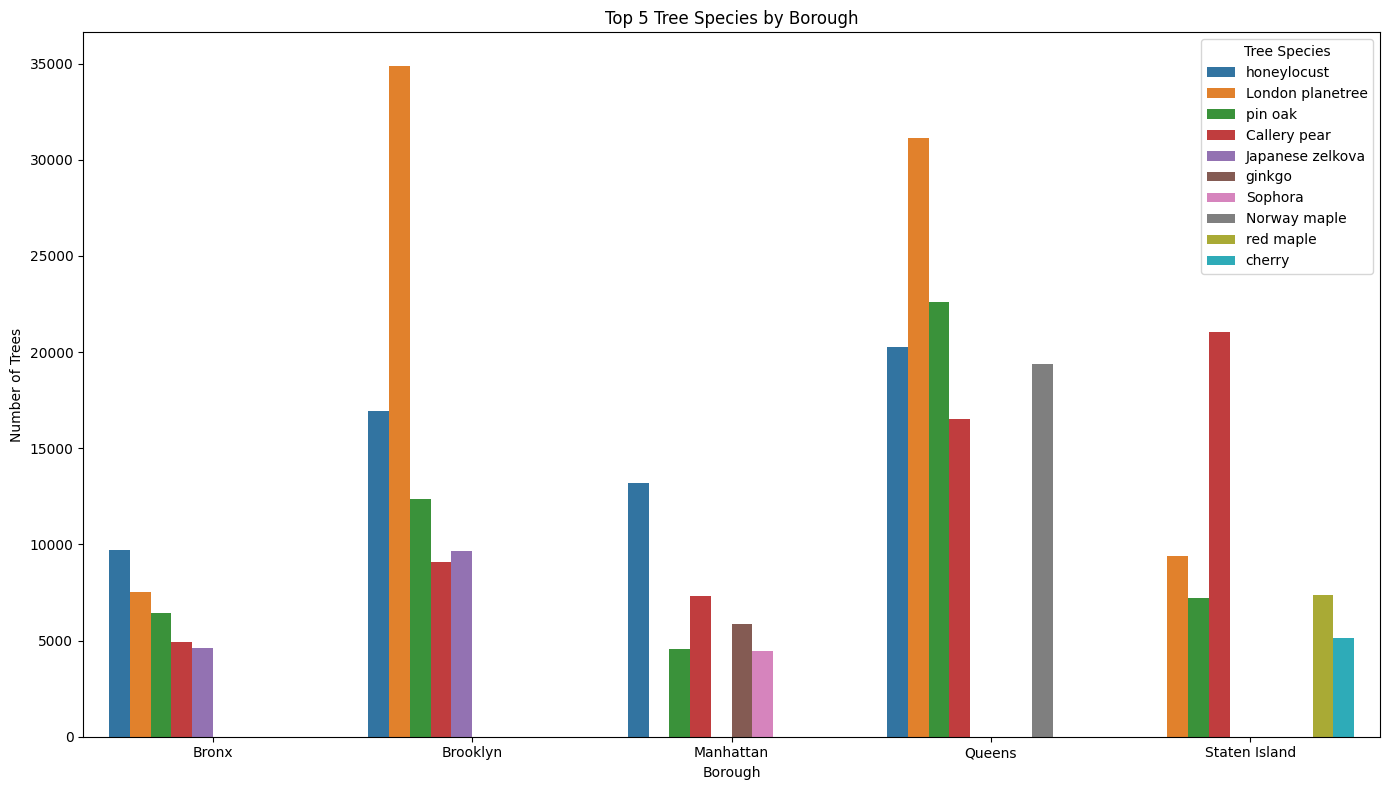

In [36]:
#Visialization of the top 5 Tree Species by Borough

plt.figure(figsize=(14, 8))
sns.barplot(data=top_five_species,  x='borough',  y='tree_id', hue='spc_common')
plt.title('Top 5 Tree Species by Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Trees')
plt.legend(title='Tree Species')
plt.tight_layout()
plt.show()


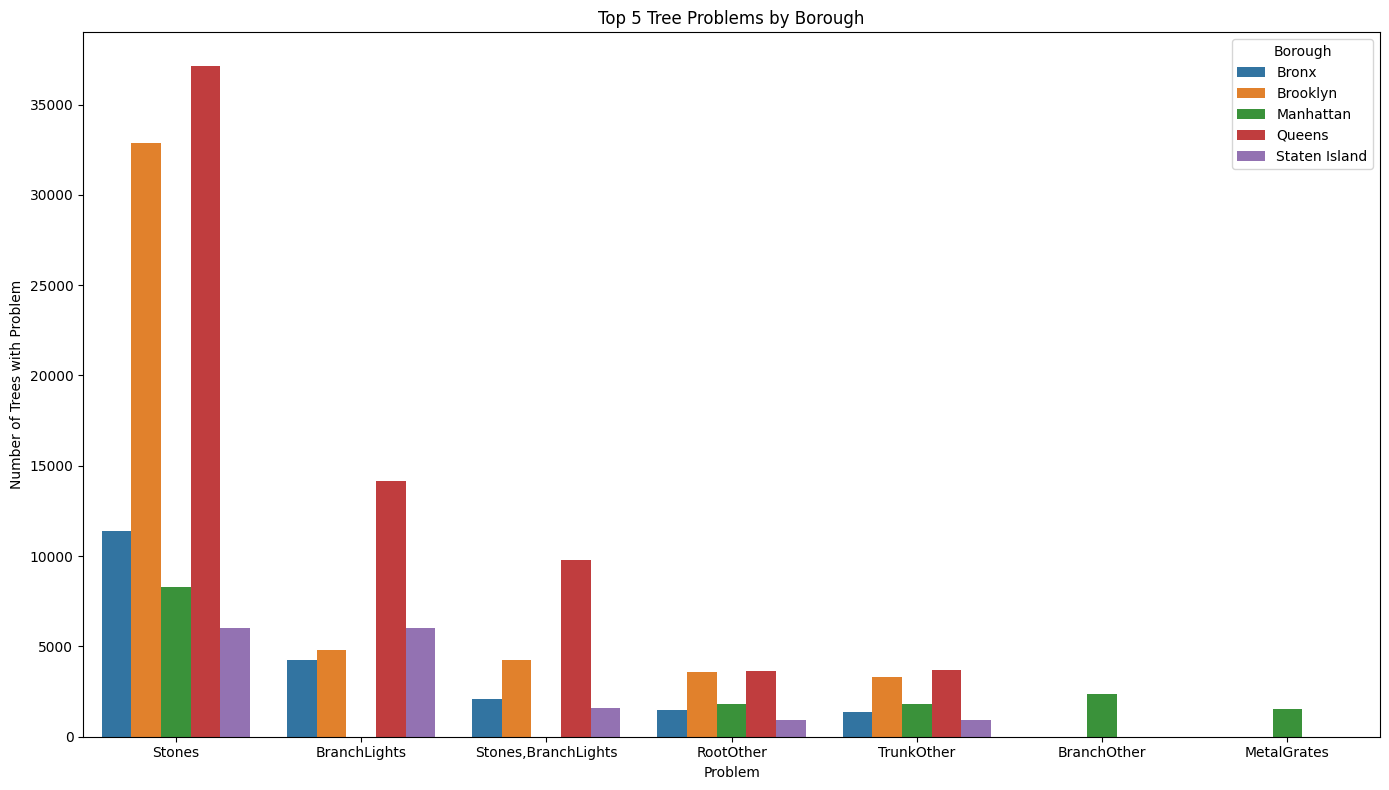

In [37]:
plt.figure(figsize=(14, 8))
sns.barplot(data=top_five_problems, x='problems', y='tree_id',hue='borough')
plt.title('Top 5 Tree Problems by Borough')
plt.xlabel('Problem')
plt.ylabel('Number of Trees with Problem')
plt.legend(title='Borough')
plt.tight_layout()
plt.show()

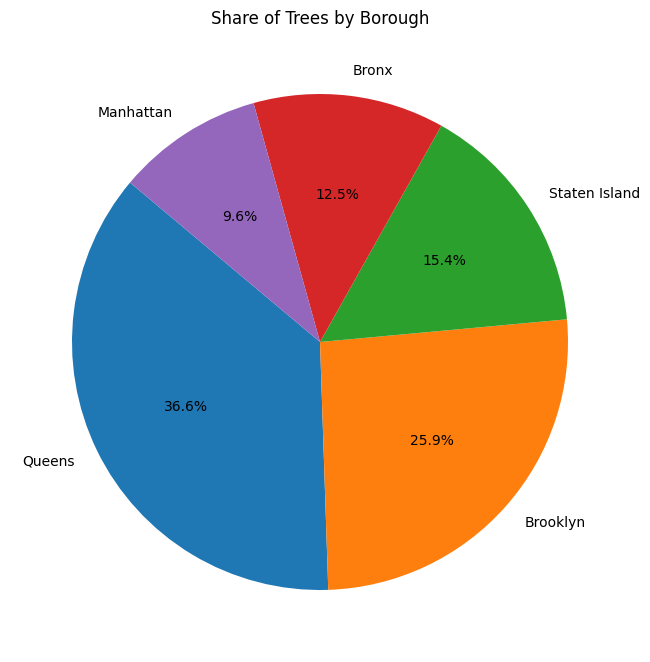

In [38]:
#Share of trees by NYC boroughs
plt.figure(figsize=(8, 10))
plt.pie(total_tree_result["Trees by borough"], labels=total_tree_result.index, autopct='%1.1f%%', startangle=140)
plt.title("Share of Trees by Borough")

plt.show()

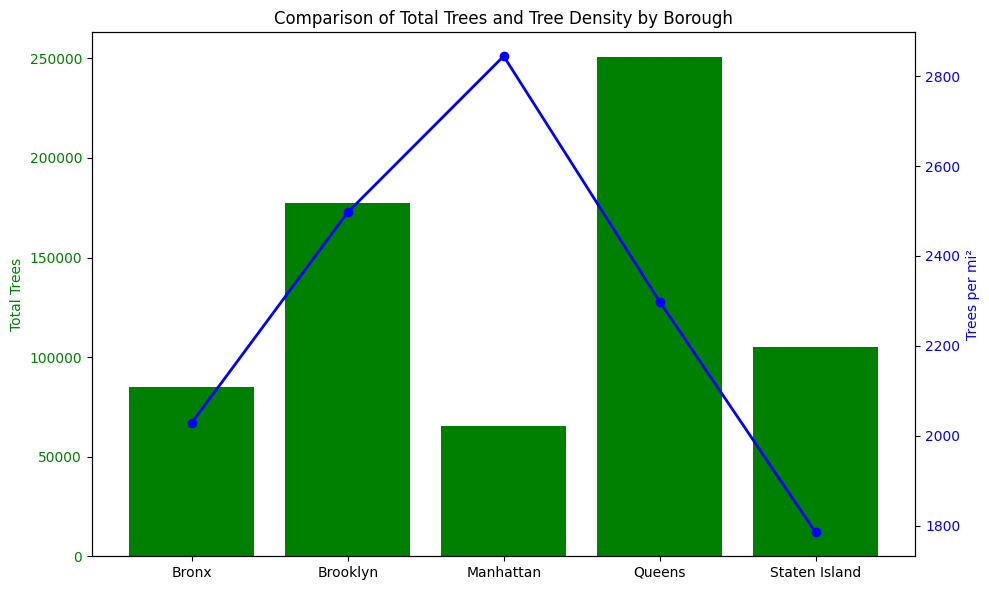

In [39]:
#Compare:  Total number of trees per borough and  Tree density per square mile (trees per mi²)
boroughs = result_area.index
total_trees = result_area["Total Trees"]
density = result_area["Trees per mi²"]

fig, ax1 = plt.subplots(figsize=(10, 6))

#Bar plot for total trees
bars = ax1.bar(boroughs, total_trees, color='green', label="Total Trees")
ax1.set_ylabel("Total Trees", color='green')
ax1.tick_params(axis='y', labelcolor='green')

#Second axis for tree density
ax2 = ax1.twinx()
ax2.plot(boroughs, density, color='blue', marker='o', linewidth=2, label="Trees per mi²")
ax2.set_ylabel("Trees per mi²", color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title("Comparison of Total Trees and Tree Density by Borough")
fig.tight_layout()
plt.show()

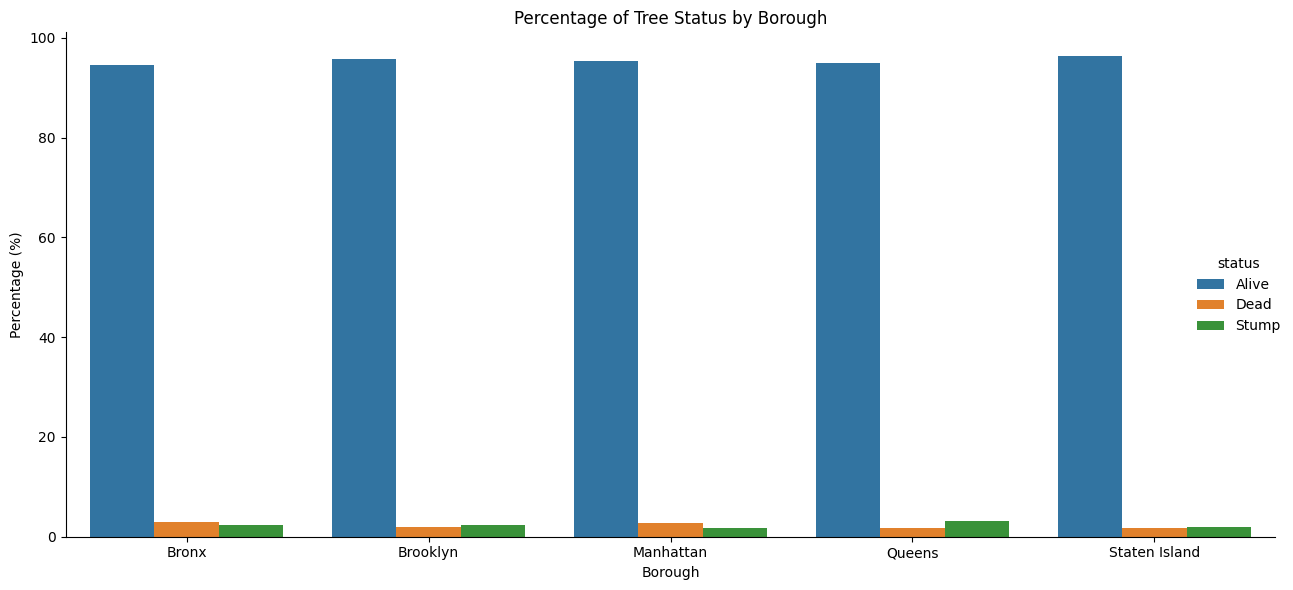

In [40]:
#Total number of trees by status (alive, dead, stump) in each New York borough
sns.catplot(
    data=status_cond_counts, kind="bar", x="borough", y="percent", hue="status",  height=6, aspect=2)

plt.title("Percentage of Tree Status by Borough")
plt.ylabel("Percentage (%)")
plt.xlabel("Borough")
plt.tight_layout()
plt.show()

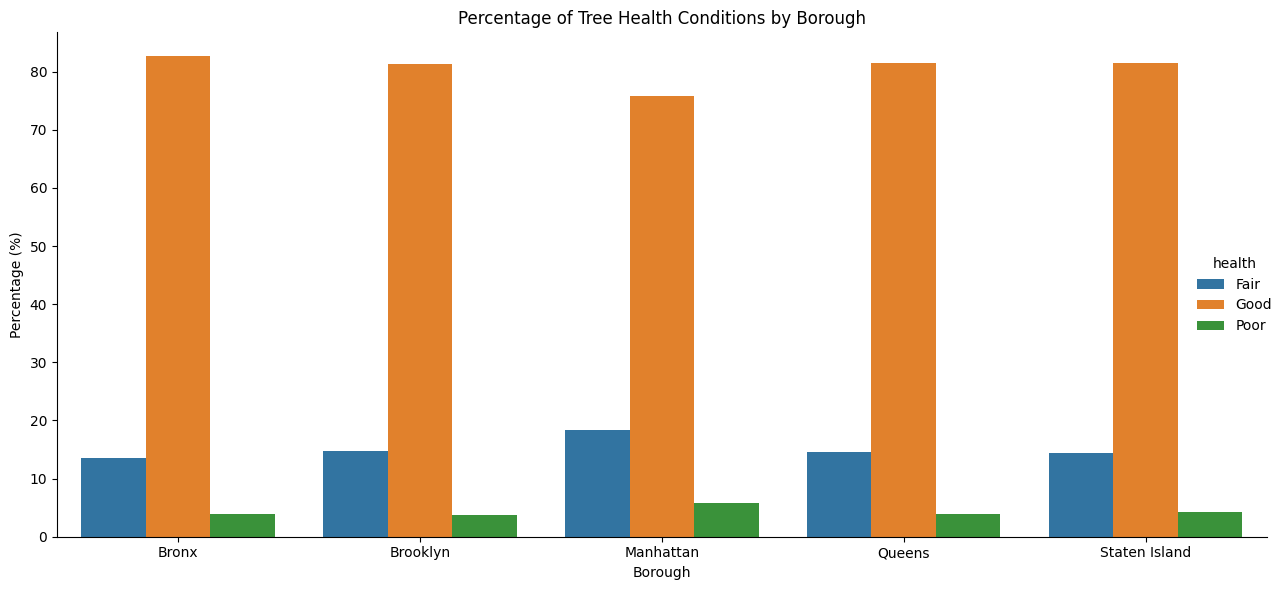

In [41]:
#Total number of trees by health condition (good, fair, poor) in each New York borough
sns.catplot(
    data=health_cond_count, kind="bar", x="borough", y="percent", hue="health", height=6, aspect=2)

plt.title("Percentage of Tree Health Conditions by Borough")
plt.ylabel("Percentage (%)")
plt.xlabel("Borough")
plt.tight_layout()
plt.show()

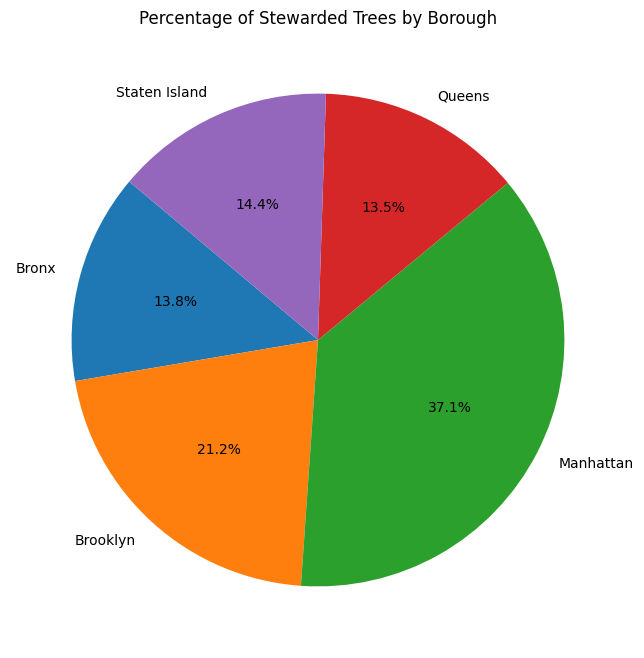

In [42]:
#Percentage of stewarded trees by NYC boroughs

#Drop any missing values
stewarded_result_clean = stewarded_result.dropna()

#Create pie chart of Stewarded %
plt.figure(figsize=(8, 8))
plt.pie(stewarded_result_clean["Stewarded %"], labels=stewarded_result_clean.index, autopct='%1.1f%%', startangle=140)
plt.title("Percentage of Stewarded Trees by Borough")

plt.show()

##Conclusion Statement




1. There are a total of 683,788 trees in the New York City boroughs.

2. The largest number of trees is in Queens, followed by Brooklyn, Staten Island, the Bronx, and Manhattan.

3. Manhattan has the highest tree density, followed by Brooklyn, Queens, the Bronx, and Staten Island

4. Tree health is generally good across all boroughs (Manhattan is slightly behind)

5. The most stewarded trees are in the Manhattan area

6. Tree data was collected by NYC Parks Staff, TreesCount Staff and NYC Parks Staff and TreesCount Staffolunteers (the most work done by volunteers: Manhattan (66.86%) and Brooklyn (43.85%))

7. Top 5 tree problems are associated with Stones, BranchLights, RootOther, Stones and BranchLights together and TrunkOther

8. Common tree species are: London planetree, honeylocust,  pin oak and Callery pear









